## Exercise 1: Supernovae Distances and Redshifts <a class="anchor" id="five"></a>

### 1.1

In [ ]:
!pip install astroML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 2.7 MB/s eta 0:00:00


(35.0, 50.0)

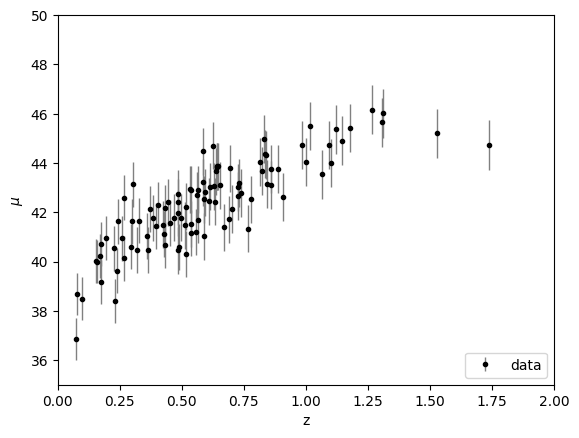

In [ ]:
from astroML.datasets import generate_mu_z
import matplotlib.pyplot as plt

z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = z_sample.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(X, mu_sample, sample_weight=dmu)
theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_
print(theta0,theta1)

39.60456481105869 [4.5911933]


(35.0, 50.0)

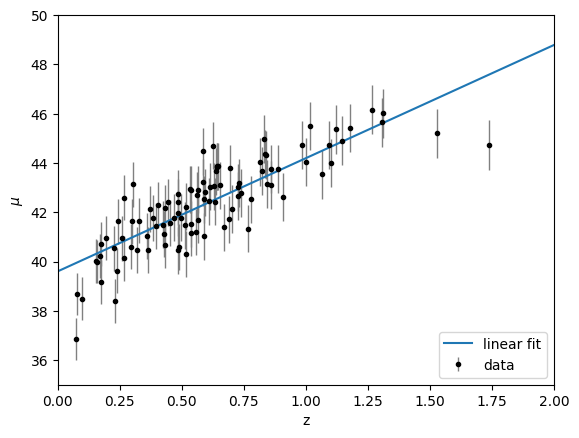

In [ ]:
z = np.linspace(0,2,100)
mu_lin = theta1*z+theta0

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(z,mu_lin, label='linear fit')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

/usr/local/lib/python3.10/dist-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


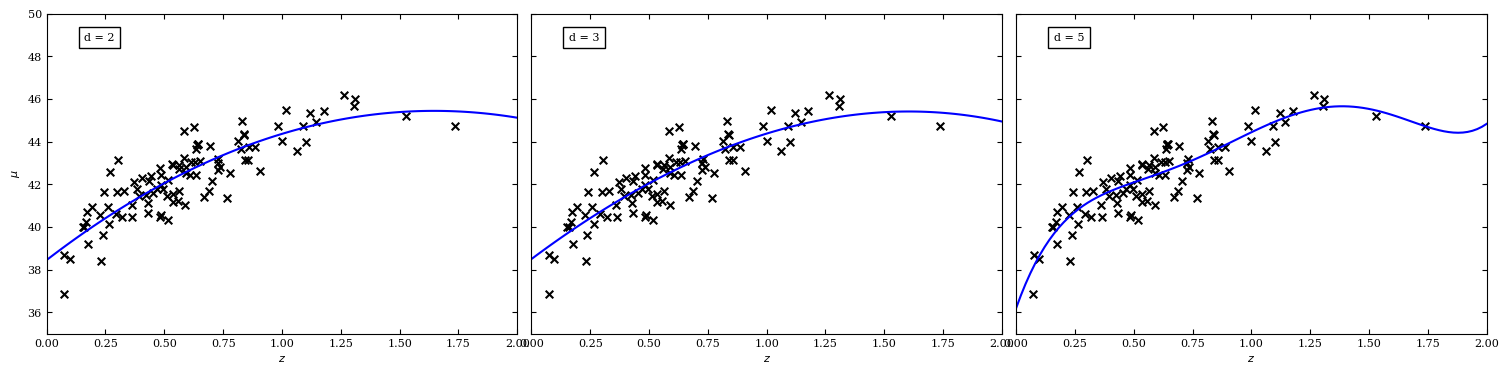

In [ ]:
from matplotlib import ticker
from matplotlib.patches import FancyArrow

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

fig = plt.figure(figsize=(16, 4))
fig.subplots_adjust(wspace=0.03, bottom=0.15,
                    top=0.95, left=0.07, right=0.97)

x_fit = np.linspace(0, 2, 100)

for i, d in enumerate([2, 3, 5]):
    ax = fig.add_subplot(131 + i)
    ax.scatter(z_sample, mu_sample, marker='x', c='k', s=30)

    p = np.polyfit(z_sample, mu_sample, d)
    y_fit = np.polyval(p, x_fit)

    ax.plot(x_fit, y_fit, '-b')
    ax.set_ylim(35, 50)
    ax.set_xlim(0, 2)
    if i in (1, 2):
        ax.yaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_ylabel('$\mu$')
    ax.set_xlabel('$z$')
    ax.text(0.08, 0.94, "d = %i" % d, transform=ax.transAxes,
            ha='left', va='top',
            bbox=dict(ec='k', fc='w'))

plt.show()

### 1.2 + 1.3 + 1.4
We can see that there is not large difference between d=2 to d=3 and they are both looks ike a good fit. So d=2 is better because it's include less parameters. d=5 looks like overfiting. d=1, the linear fit is underfiting.

### 1.5

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_cv, ydy_train, ydy_cv = train_test_split(X, np.array([mu_sample,dmu]).T, test_size=0.4,random_state=42)
y_train,dy_train = ydy_train.T
y_cv,dy_cv = ydy_cv.T

Best plotnomial degree is 4


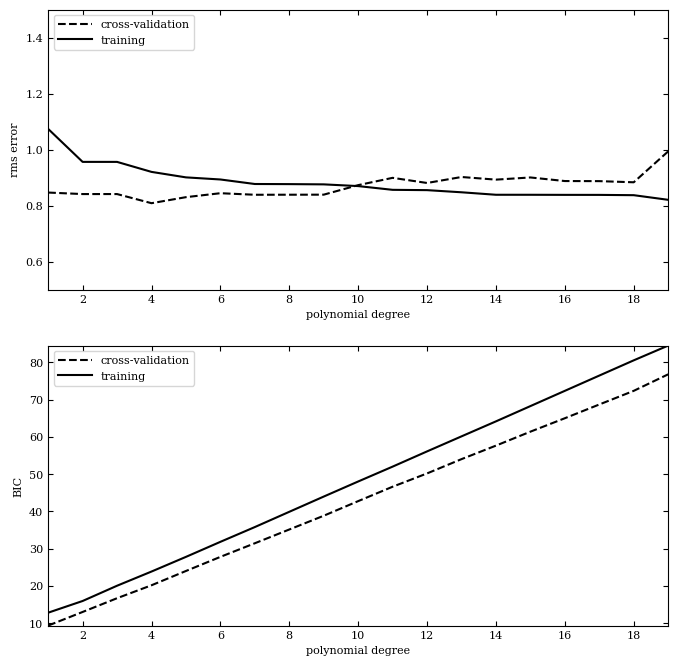

In [ ]:
from astroML.linear_model import PolynomialRegression

d = np.arange(1, 20)
training_err = np.zeros(d.shape)
crossval_err = np.zeros(d.shape)

fig = plt.figure(figsize=(8, 8))
for i in range(len(d)):
    pol_reg = PolynomialRegression(d[i])
    pol_reg.fit(X_train, y_train,dy_train)
    y_pred = pol_reg.predict(X_train)
    training_err[i] = np.sqrt(np.sum((y_pred - y_train) ** 2)
                              / len(y_train))
    y_pred = pol_reg.predict(X_cv)
    crossval_err[i] = np.sqrt(np.sum((y_pred - y_cv) ** 2)
                              / len(y_cv))

print('Best plotnomial degree is', d[np.argmin(crossval_err)])

ax = fig.add_subplot(211)
ax.plot(d, crossval_err, '--k', label='cross-validation')
ax.plot(d, training_err, '-k', label='training')
ax.plot(d, 0.1 * np.ones(d.shape), ':k')

#ax.set_xlim(0, 14)
ax.set_ylim(0.5, 1.5)

ax.set_xlabel('polynomial degree')
ax.set_ylabel('rms error')
ax.legend(loc=2)


BIC_train = np.sqrt(len(y_train)) * training_err / np.mean(dy_train) + d * np.log(len(y_train))
BIC_crossval = np.sqrt(len(y_cv)) * crossval_err / np.mean(dy_cv) + d * np.log(len(y_cv))

ax = fig.add_subplot(212)
ax.plot(d, BIC_crossval, '--k', label='cross-validation')
ax.plot(d, BIC_train, '-k', label='training')

#ax.set_xlim(0, 14)
#ax.set_ylim(0, 75)

ax.legend(loc=2)
ax.set_xlabel('polynomial degree')
ax.set_ylabel('BIC')


plt.show()


(35.0, 50.0)

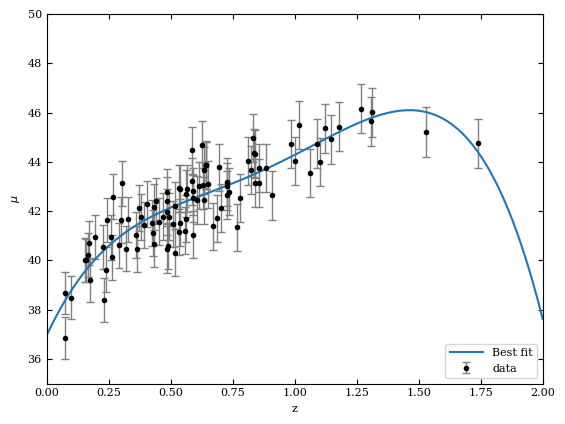

In [ ]:
z = np.linspace(0,2,100)

pol_reg = PolynomialRegression(4)
pol_reg.fit(X, mu_sample, dmu)
mu_pol = pol_reg.predict(z.reshape(-1,1))


plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(z,mu_pol, label='Best fit')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

The best polynomial dgree is 4.

### 1.6

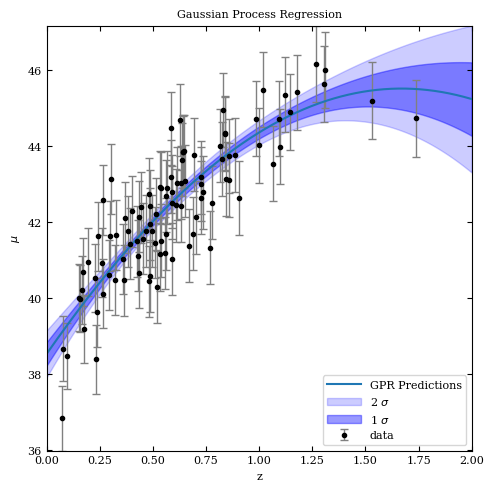

In [ ]:
from __future__ import print_function, division
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.gaussian_process import GaussianProcessRegressor
from astropy.cosmology import LambdaCDM
from astroML.datasets import generate_mu_z

z = np.linspace(0.01, 2, 1000)

# fit the data
# Mesh the input space for evaluations of the real function,
# the prediction and its MSE
z_fit = np.linspace(0, 2, 1000)

kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel, alpha=dmu ** 2)

gp.fit(z_sample[:, None], mu_sample)
y_pred, sigma = gp.predict(z_fit[:, None], return_std=True)

# Plot the gaussian process
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95)


plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

plt.plot(z_fit, y_pred, label='GPR Predictions')


plt.fill_between(z_fit.flatten(), y_pred - 2 * sigma, y_pred + 2 * sigma, alpha=0.2, color='b', label='2 $\sigma$')

plt.fill_between(z_fit.flatten(), y_pred -  sigma, y_pred +  sigma, alpha=0.4, color='b', label='1 $\sigma$')

ax.set_xlabel('$z$')
ax.set_ylabel(r'$\mu$')

ax.set_xlim(0, 2)
ax.set_ylim(36, 48)


plt.xlabel("z")
plt.ylabel("$\mu$")
plt.title('Gaussian Process Regression')

plt.legend()
plt.show()

## Exercise 2: Dark Energy <a class="anchor" id="five"></a>

### 2.1

Estimated parameter values:
H0 = 68.52035346808327 +/- 7.476393666706351
Omega_m = 0.3448669352615214 +/- 0.28327515615084164


<ipython-input-48-91b34e8f7c02>:11: RuntimeWarning: divide by zero encountered in log10
  mu += [5 * np.log10((c / H0) * (1 + zi) / 10 * 1e6 * quad(integrand, 0, zi)[0])] # factor 1e6 to get unitless quantity


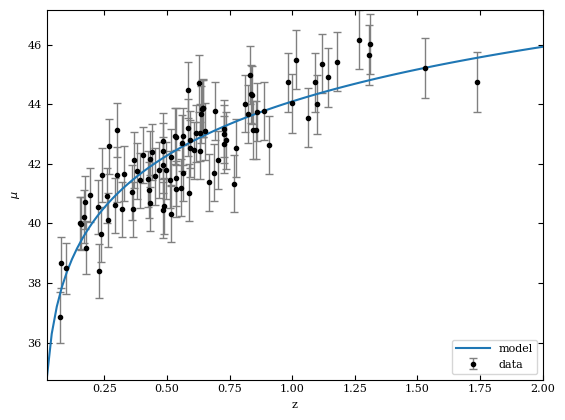

In [ ]:
from scipy.integrate import quad
from scipy.optimize import minimize, curve_fit
from scipy.optimize import least_squares

def mu_fit(z,H0, Omega_m):
  c = 299792.458  # Speed of light in km/s
  Omega_Lambda = 1-Omega_m
  integrand = lambda z_prime: 1 / np.sqrt(Omega_m * (1 + z_prime)**3 + Omega_Lambda)
  mu = []
  for zi in z:
    mu += [5 * np.log10((c / H0) * (1 + zi) / 10 * 1e6 * quad(integrand, 0, zi)[0])] # factor 1e6 to get unitless quantity
  return mu


p0 = [70, 0.3]  # Initial guess
popt, pcov = curve_fit(mu_fit, z_sample, mu_sample, sigma=dmu, p0=p0)

H0_fit, Omega_m_fit = popt
H0_err, Omega_m_err = np.sqrt(np.diag(pcov))

print("Estimated parameter values:")
print("H0 =", H0_fit, "+/-", H0_err)
print("Omega_m =", Omega_m_fit, "+/-", Omega_m_err)
#print("Omega_Lanbda =", Omega_Lambda_fit, "+/-", Omega_Lambda_fit_err)


z = np.linspace(0,2,100)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(z, mu_fit(z, *popt), label='model')

plt.legend(loc='lower right')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.show()



In [ ]:
print(pcov)

correlation_matrix = np.corrcoef(pcov)
correlation_coefficient = correlation_matrix[0, 1]

print("Correlation coefficient between H0 and Omega_m:", correlation_coefficient)


[[55.89646226 -1.95163995]
 [-1.95163995  0.08024481]]
Correlation coefficient between H0 and Omega_m: -1.0


The correltion coeffitient is -1, thus $H_0$ and $\Omega_m$ are coorelated.

Estimated parameter values:
H0 = [57.60674718] +/- [2.44732855]


<ipython-input-49-adbeb96b9a03>:10: RuntimeWarning: divide by zero encountered in log10
  mu += [5 * np.log10((c / H0) * (1 + zi) / 10 * 1e6 * quad(integrand, 0, zi)[0])] # factor 1e6 to get unitless quantity
<ipython-input-48-91b34e8f7c02>:11: RuntimeWarning: divide by zero encountered in log10
  mu += [5 * np.log10((c / H0) * (1 + zi) / 10 * 1e6 * quad(integrand, 0, zi)[0])] # factor 1e6 to get unitless quantity


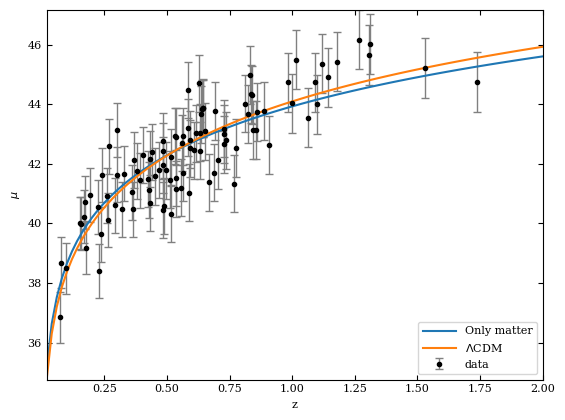

In [ ]:
from scipy.integrate import quad
from scipy.optimize import minimize, curve_fit
from scipy.optimize import least_squares

def mu_fit_only_matter(z,H0):
  c = 299792.458  # Speed of light in km/s
  integrand = lambda z_prime: 1 / np.sqrt((1 + z_prime)**3)
  mu = []
  for zi in z:
    mu += [5 * np.log10((c / H0) * (1 + zi) / 10 * 1e6 * quad(integrand, 0, zi)[0])] # factor 1e6 to get unitless quantity
  return mu


p0 = [70]  # Initial guess
popt_new, pcov_new = curve_fit(mu_fit_only_matter, z_sample, mu_sample, sigma=dmu, p0=p0)

H0_fit_matter = popt_new
H0_err_matter = np.sqrt(np.diag(pcov_new))

print("Estimated parameter values:")
print("H0 =", H0_fit_matter, "+/-", H0_err_matter)

z = np.linspace(0,2,100)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(z, mu_fit_only_matter(z, *popt_new), label='Only matter')
plt.plot(z, mu_fit(z, *popt), label=r'$\Lambda$CDM')

plt.legend(loc='lower right')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.show()



I don't sure if these data contain evidence of dark energy, both of the fits looks good.

### 2.2

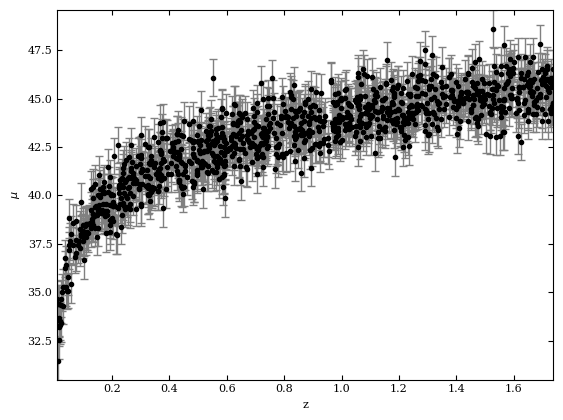

In [ ]:
from scipy.stats import norm

popt, pcov = curve_fit(mu_fit, z_sample, mu_sample, sigma=dmu, p0=[70,0.3])

num_clones = 10
x_cloned = np.tile(z_sample, num_clones)
y_cloned = np.tile(mu_sample, num_clones)
dy_cloned = np.tile(dmu, num_clones)

z_max = np.max(z_sample)
z_cloned = np.random.uniform(0, z_max, size=len(x_cloned))
z_cloned = np.sort(z_cloned)

mu_data = mu_fit(z_cloned, *popt)
mu_noisy = mu_data + norm.rvs(scale=dy_cloned)

x_combined = np.concatenate((z_sample, z_cloned))
y_combined = np.concatenate((mu_sample, mu_noisy))
dy_combined = np.concatenate((dmu, dy_cloned))


plt.errorbar(x_combined, y_combined, dy_combined, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.show()


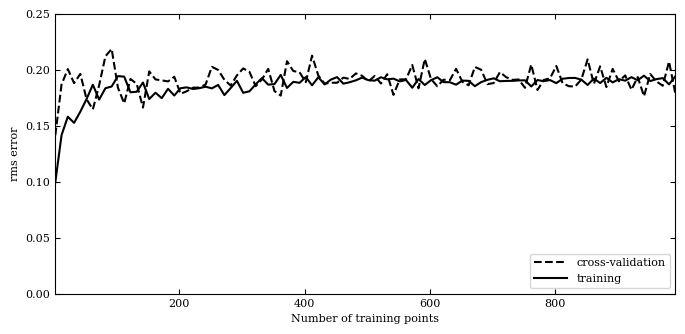

In [ ]:
from sklearn.model_selection import KFold

Nrange = np.arange(2, 1000, 10)
training_err = np.zeros(Nrange.shape)
crossval_err = np.zeros(Nrange.shape)

# k-fold cross-validation with k=5
k = 5
kf = KFold(n_splits=k, shuffle=True)

fig = plt.figure(figsize=(8, 8))
for i, N in enumerate(Nrange):
    for train_index, cv_index in kf.split(X):
        X_train, X_cv = x_combined[train_index], x_combined[cv_index]
        y_train, y_cv = y_combined[train_index], y_combined[cv_index]
        #p = np.polyfit(X_train[:N], y_train[:N], d[i])
        training_err[i] = np.sqrt(np.sum((mu_fit(X_train[:N], *popt) - y_train[:N]) ** 2)
                                  / len(y_train[:N]))
        crossval_err[i] = np.sqrt(np.sum((mu_fit(X_cv[:N], *popt) - y_cv[:N]) ** 2)
                                  / len(y_cv[:N]))
    training_err[i] = training_err[i]/k
    crossval_err[i] = crossval_err[i]/k



ax = fig.add_subplot(211)

ax.plot(Nrange, crossval_err, '--k', label='cross-validation')
ax.plot(Nrange, training_err, '-k', label='training')
ax.legend(loc=4)


ax.set_xlabel('Number of training points')
ax.set_ylabel('rms error')
plt.ylim([0,0.25])

plt.show()

We see a convergence at around 200 samples - there's not much more science we could do with more samples.
This result persist for both the GPR fit and the $\Lambda$CDM fit.